In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-lab-2022-spring-kaggle/train_final.csv
/kaggle/input/data-science-lab-2022-spring-kaggle/test_final.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import roc_auc_score
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import tree, ensemble
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [4]:
df_train=pd.read_csv('../input/data-science-lab-2022-spring-kaggle/train_final.csv')
df_test=pd.read_csv('../input/data-science-lab-2022-spring-kaggle/test_final.csv')

In [3]:
df_train=pd.read_csv(r'C:\Users\RAGHU BOMMANA\Downloads\Kaggle comp\train_final.csv')
df_test=pd.read_csv(r'C:\Users\RAGHU BOMMANA\Downloads\Kaggle comp\test_final.csv')

In [4]:
X=np.array(df_train.drop(['Y','Id'],axis=1))
y=np.array(df_train['Y'])

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state
random_state=check_random_state(0)
permutation=random_state.permutation(X.shape[0])
X = X[permutation]
y=y[permutation]
X = X.reshape((X.shape[0], -1))
X=pd.DataFrame(X)
y=pd.DataFrame(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify=y, random_state=42)

In [6]:
y_train=np.ravel(y_train)
y_test=np.ravel(y_test)

In [7]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

13    0.068374
14    0.038437
15    0.016000
0     0.015347
7     0.014940
3     0.011569
18    0.010226
6     0.009853
12    0.008467
16    0.008185
1     0.006380
23    0.006347
8     0.005511
19    0.004090
21    0.003400
17    0.003391
10    0.002216
4     0.002187
20    0.002138
5     0.001267
22    0.001106
9     0.001022
2     0.000193
11    0.000000
dtype: float64

In [8]:
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=15)
sel_five_cols.fit(X_train, y_train)
c=X_train.columns[sel_five_cols.get_support()]
X_train3 = X_train[X_train.columns.intersection(c)]
X_test3=X_test[X_test.columns.intersection(c)]

In [9]:
sel_five_cols = SelectKBest(mutual_info_classif, k=15)
sel_five_cols.fit(X, y)
lb=X.columns[sel_five_cols.get_support()]
X1 = X[X.columns.intersection(lb)]

C:\Users\RAGHU BOMMANA\Anaconda3\envs\ml_pytorch\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [13]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
qt = QuantileTransformer(n_quantiles=600, output_distribution='normal')
for i in [14,15,0]:
    array = np.array(X1[i]).reshape(-1, 1)
    v = qt.fit_transform(array)
    X1[i]=v
X1

C:\Users\RAGHU BOMMANA\Anaconda3\envs\ml_pytorch\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\RAGHU BOMMANA\Anaconda3\envs\ml_pytorch\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\RAGHU BOMMANA\Anaconda3\envs\ml_pytorch\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,0,3,6,7,12,13,14,15,16,17,18,19,21,22,23
0,-1.066191,118213.0,118212.0,117906.0,117908.0,-0.218055,-0.199772,1.330176,290919.0,1.0,117905.0,1.0,1.0,1.0,1.0
1,-1.456545,118327.0,117961.0,117906.0,117908.0,0.472692,-0.119755,0.539828,290919.0,1.0,117905.0,1.0,1.0,1.0,1.0
2,1.289007,118343.0,117961.0,117906.0,117908.0,-0.261004,-0.797322,-0.071200,290919.0,1.0,117905.0,1.0,1.0,1.0,1.0
3,1.692824,117903.0,117902.0,117906.0,117908.0,-0.374357,-0.202472,0.652327,290919.0,1.0,117905.0,1.0,1.0,7.0,1.0
4,0.380260,117962.0,117961.0,130085.0,120173.0,1.000000,0.689008,1.113620,290919.0,1.0,120172.0,1.0,1.0,16.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16378,-0.302328,118343.0,117961.0,239604.0,124888.0,-1.589749,0.394954,-0.318140,118643.0,1.0,124886.0,1.0,1.0,123.0,1.0
16379,-1.628090,118300.0,117961.0,311441.0,120649.0,2.833524,0.023264,1.041739,118398.0,1.0,120647.0,1.0,1.0,86.0,1.0
16380,0.119468,117891.0,117890.0,117879.0,117880.0,-1.956372,0.290694,-1.769595,19721.0,1.0,117879.0,1.0,1.0,2.0,1.0
16381,-1.145295,118300.0,117961.0,117906.0,118322.0,-0.399065,-0.267695,0.130091,290919.0,1.0,118321.0,1.0,1.0,1.0,1.0


In [14]:
rf4=ensemble.RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=40,
                       min_samples_leaf=1, min_samples_split=2,
                       n_estimators=1577, max_features='sqrt',class_weight='balanced_subsample',random_state=0).fit(X1,y)
print(roc_auc_score(y, rf4.predict_proba(X1)[:, 1]))

C:\Users\RAGHU BOMMANA\Anaconda3\envs\ml_pytorch\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


1.0


In [15]:
prediction=rf4.predict(X1)
print(confusion_matrix(y,prediction))
print(accuracy_score(y,prediction))
print(classification_report(y,prediction))

[[  948     0]
 [    0 15435]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       948
           1       1.00      1.00      1.00     15435

    accuracy                           1.00     16383
   macro avg       1.00      1.00      1.00     16383
weighted avg       1.00      1.00      1.00     16383



In [16]:
from xgboost import XGBClassifier

xgb_model1 = XGBClassifier(eta=0.15, colsample_bytree=0.725, eval_metric='auc', max_depth=20,gamma=0.05,min_child_weight=0.8,
              n_estimators=1000, scale_pos_weight=0.08, reg_lambda=2,reg_alpha=2.5,subsample=0.5,random_state=0).fit(X1, y)

# predict
xgb_y_predict = xgb_model1.predict(X1)
xgb_score = accuracy_score(xgb_y_predict, y)

print('Accuracy score is:', xgb_score)
print(roc_auc_score(y, xgb_model1.predict_proba(X1)[:, 1]))
#print(roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]))

prediction=xgb_model1.predict(X1)
print(confusion_matrix(y,prediction))
print(accuracy_score(y,prediction))
print(classification_report(y,prediction))

C:\Users\RAGHU BOMMANA\Anaconda3\envs\ml_pytorch\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\RAGHU BOMMANA\Anaconda3\envs\ml_pytorch\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy score is: 0.9779649636818654
0.9985971523429544
[[  945     3]
 [  358 15077]]
0.9779649636818654
              precision    recall  f1-score   support

           0       0.73      1.00      0.84       948
           1       1.00      0.98      0.99     15435

    accuracy                           0.98     16383
   macro avg       0.86      0.99      0.91     16383
weighted avg       0.98      0.98      0.98     16383



In [17]:
Xt=df_test.drop(['Id'],axis=1)
Xt=np.array(Xt)
Xt=pd.DataFrame(Xt)
Xt

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,37733.0,1.0,1.77,118603.0,1.0,0.0,118602.0,118097.0,1.0,0.0,...,13881.0,117941.0,117887.0,1.0,117885.0,1.0,1.0,1.0,1.0,1.0
1,312129.0,1.0,3.54,118052.0,1.0,0.0,117961.0,290919.0,1.0,4.0,...,14638.0,118992.0,290919.0,1.0,118321.0,1.0,1.0,1.0,7.0,1.0
2,24884.0,1.0,23.01,118300.0,1.0,0.0,117961.0,302830.0,1.0,0.0,...,770.0,119181.0,4673.0,1.0,128230.0,1.0,1.0,1.0,14.0,1.0
3,4674.0,1.0,1.77,119091.0,1.0,0.0,119062.0,118036.0,1.0,9.0,...,16752.0,143531.0,290919.0,1.0,117905.0,1.0,1.0,1.0,81.0,1.0
4,68725.0,1.0,3.54,118300.0,1.0,0.0,117961.0,171056.0,1.0,0.0,...,4945.0,118360.0,118638.0,1.0,118636.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16380,971.0,1.0,1.77,118300.0,1.0,0.0,117961.0,310997.0,1.0,0.0,...,4864.0,123055.0,118424.0,1.0,120344.0,1.0,1.0,1.0,44.0,1.0
16381,105802.0,1.0,1.77,118327.0,1.0,0.0,117961.0,117906.0,1.0,0.0,...,32457.0,118320.0,290919.0,1.0,118321.0,1.0,1.0,1.0,4.0,1.0
16382,43096.0,1.0,3.54,117962.0,1.0,0.0,117961.0,118368.0,1.0,0.0,...,2014.0,117904.0,117887.0,1.0,118368.0,1.0,1.0,1.0,1.0,1.0
16383,31220.0,1.0,1.77,118386.0,1.0,0.0,117961.0,117906.0,1.0,1.0,...,1249.0,118910.0,290919.0,1.0,118321.0,1.0,1.0,1.0,2.0,2.0


In [18]:
Xt1 = Xt[Xt.columns.intersection(lb)]
#Xt1=np.array(Xt1)
print(Xt1)

             0         3         6         7         12        13       14  \
0       37733.0  118603.0  118602.0  118097.0  117888.0  2.453740  13881.0   
1      312129.0  118052.0  117961.0  290919.0  118322.0 -0.012317  14638.0   
2       24884.0  118300.0  117961.0  302830.0  128231.0  1.000000    770.0   
3        4674.0  119091.0  119062.0  118036.0  117908.0  1.000000  16752.0   
4       68725.0  118300.0  117961.0  171056.0  118639.0 -0.503250   4945.0   
...         ...       ...       ...       ...       ...       ...      ...   
16380     971.0  118300.0  117961.0  310997.0  120346.0  1.000000   4864.0   
16381  105802.0  118327.0  117961.0  117906.0  118322.0  0.580688  32457.0   
16382   43096.0  117962.0  117961.0  118368.0  118486.0  1.000000   2014.0   
16383   31220.0  118386.0  117961.0  117906.0  118322.0 -2.374507   1249.0   
16384   41642.0  118052.0  117961.0  172635.0  117908.0  2.714601  13854.0   

             15        16   17        18   19   21    22   23  

In [19]:
preds=0.85*rf4.predict_proba(Xt1)+0.15*xgb_model1.predict_proba(Xt1)
preds

array([[0.09195608, 0.90804393],
       [0.1380579 , 0.8619421 ],
       [0.02833062, 0.97166939],
       ...,
       [0.01835709, 0.98164291],
       [0.09451094, 0.90548906],
       [0.07518508, 0.92481493]])

In [20]:
pr=0.85*rf4.predict(Xt1)+0.15*xgb_model1.predict(Xt1)
pr

array([1., 1., 1., ..., 1., 1., 1.])

In [21]:
yt=pd.DataFrame(pr,dtype=int)
yt

,0
0,1
1,1
2,1
3,1
4,1
...,...
16380,1
16381,1
16382,1
16383,1


In [22]:
y

,0
0,1
1,1
2,1
3,1
4,1
...,...
16378,1
16379,1
16380,1
16381,1


In [23]:
y=pd.DataFrame(y)
y_final=pd.concat([y,yt],ignore_index=True)
y_final

,0
0,1
1,1
2,1
3,1
4,1
...,...
32763,1
32764,1
32765,1
32766,1


In [24]:
y_final.value_counts()

1    31441
0     1327
dtype: int64

In [26]:
for i in [14,15,0]:
    array = np.array(Xt1[i]).reshape(-1, 1)
    v = qt.fit_transform(array)
    Xt1[i]=v
Xt1

C:\Users\RAGHU BOMMANA\Anaconda3\envs\ml_pytorch\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\RAGHU BOMMANA\Anaconda3\envs\ml_pytorch\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\RAGHU BOMMANA\Anaconda3\envs\ml_pytorch\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

,0,3,6,7,12,13,14,15,16,17,18,19,21,22,23
0,0.110671,118603.0,118602.0,118097.0,117888.0,2.453740,0.015296,-1.125366,117887.0,1.0,117885.0,1.0,1.0,1.0,1.0
1,3.550936,118052.0,117961.0,290919.0,118322.0,-0.012317,0.031390,0.062812,290919.0,1.0,118321.0,1.0,1.0,7.0,1.0
2,-0.509558,118300.0,117961.0,302830.0,128231.0,1.000000,-1.945183,0.134313,4673.0,1.0,128230.0,1.0,1.0,14.0,1.0
3,-1.438648,119091.0,119062.0,118036.0,117908.0,1.000000,0.183833,2.276740,290919.0,1.0,117905.0,1.0,1.0,81.0,1.0
4,0.595983,118300.0,117961.0,171056.0,118639.0,-0.503250,-0.573332,-0.726641,118638.0,1.0,118636.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16380,-2.127374,118300.0,117961.0,310997.0,120346.0,1.000000,-0.604952,1.238964,118424.0,1.0,120344.0,1.0,1.0,44.0,1.0
16381,2.077440,118327.0,117961.0,117906.0,118322.0,0.580688,0.626656,-0.799432,290919.0,1.0,118321.0,1.0,1.0,4.0,1.0
16382,0.418403,117962.0,117961.0,118368.0,118486.0,1.000000,-1.294985,-1.329632,117887.0,1.0,118368.0,1.0,1.0,1.0,1.0
16383,-0.234134,118386.0,117961.0,117906.0,118322.0,-2.374507,-1.612539,-0.016740,290919.0,1.0,118321.0,1.0,1.0,2.0,2.0


In [27]:
X_final=pd.concat([X1,Xt1],ignore_index=True)
X_final

,0,3,6,7,12,13,14,15,16,17,18,19,21,22,23
0,-1.066191,118213.0,118212.0,117906.0,117908.0,-0.218055,-0.199772,1.330176,290919.0,1.0,117905.0,1.0,1.0,1.0,1.0
1,-1.456545,118327.0,117961.0,117906.0,117908.0,0.472692,-0.119755,0.539828,290919.0,1.0,117905.0,1.0,1.0,1.0,1.0
2,1.289007,118343.0,117961.0,117906.0,117908.0,-0.261004,-0.797322,-0.071200,290919.0,1.0,117905.0,1.0,1.0,1.0,1.0
3,1.692824,117903.0,117902.0,117906.0,117908.0,-0.374357,-0.202472,0.652327,290919.0,1.0,117905.0,1.0,1.0,7.0,1.0
4,0.380260,117962.0,117961.0,130085.0,120173.0,1.000000,0.689008,1.113620,290919.0,1.0,120172.0,1.0,1.0,16.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32763,-2.127374,118300.0,117961.0,310997.0,120346.0,1.000000,-0.604952,1.238964,118424.0,1.0,120344.0,1.0,1.0,44.0,1.0
32764,2.077440,118327.0,117961.0,117906.0,118322.0,0.580688,0.626656,-0.799432,290919.0,1.0,118321.0,1.0,1.0,4.0,1.0
32765,0.418403,117962.0,117961.0,118368.0,118486.0,1.000000,-1.294985,-1.329632,117887.0,1.0,118368.0,1.0,1.0,1.0,1.0
32766,-0.234134,118386.0,117961.0,117906.0,118322.0,-2.374507,-1.612539,-0.016740,290919.0,1.0,118321.0,1.0,1.0,2.0,2.0


In [28]:
X_final.drop(labels=[25992,22051,19148,23473],axis=0,inplace=True)
y_final.drop(labels=[25992,22051,19148,23473],axis=0,inplace=True)

In [24]:
# from sklearn.preprocessing import PowerTransformer, QuantileTransformer
# qt = QuantileTransformer(n_quantiles=600, output_distribution='normal')
# for i in [14,15,0]:
#     array = np.array(X_final[i]).reshape(-1, 1)
#     v = qt.fit_transform(array)
#     X_final[i]=v
# X_final

,0,3,4,6,7,12,13,14,15,16,18,19,20,21,23
0,-1.070754,118213.0,1.0,118212.0,117906.0,117908.0,-0.218055,-0.212596,1.329632,290919.0,117905.0,1.0,1.0,1.0,1.0
1,-1.450527,118327.0,1.0,117961.0,117906.0,117908.0,0.472692,-0.132544,0.547104,290919.0,117905.0,1.0,1.0,1.0,1.0
2,1.291536,118343.0,1.0,117961.0,117906.0,117908.0,-0.261004,-0.802027,-0.067005,290919.0,117905.0,1.0,1.0,1.0,1.0
3,1.693328,117903.0,2.0,117902.0,117906.0,117908.0,-0.374357,-0.215304,0.658037,290919.0,117905.0,1.0,1.0,1.0,1.0
4,0.388399,117962.0,1.0,117961.0,130085.0,120173.0,1.000000,0.680463,1.113620,290919.0,120172.0,1.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32763,-2.107683,118300.0,1.0,117961.0,310997.0,120346.0,1.000000,-0.595219,1.238964,118424.0,120344.0,1.0,1.0,1.0,1.0
32764,2.081682,118327.0,1.0,117961.0,117906.0,118322.0,0.580688,0.631757,-0.802315,290919.0,118321.0,1.0,1.0,1.0,1.0
32765,0.409009,117962.0,1.0,117961.0,118368.0,118486.0,1.000000,-1.290160,-1.350170,117887.0,118368.0,1.0,1.0,1.0,1.0
32766,-0.251311,118386.0,1.0,117961.0,117906.0,118322.0,-2.374507,-1.618712,-0.016740,290919.0,118321.0,1.0,1.0,1.0,2.0


In [29]:
X_final.shape,y_final.shape

((32764, 15), (32764, 1))

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state
random_state=check_random_state(0)
permutation=random_state.permutation(X.shape[0])
X_final=np.array(X_final)
y_final=np.array(y_final)
X_final = X_final[permutation]
y_final=y_final[permutation]
X_final = X_final.reshape((X_final.shape[0], -1))
X_final=pd.DataFrame(X_final)
y_final=pd.DataFrame(y_final)
Xf_train, Xf_test, yf_train, yf_test = train_test_split(X_final, y_final, test_size=0.30,stratify=y_final, random_state=42)

In [31]:
rf5=ensemble.RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=30,
                       min_samples_leaf=1, min_samples_split=3,
                       n_estimators=900, max_features='sqrt',class_weight='balanced_subsample',random_state=0).fit(Xf_train,yf_train)
print(roc_auc_score(yf_train, rf5.predict_proba(Xf_train)[:, 1]))
print(roc_auc_score(yf_test, rf5.predict_proba(Xf_test)[:, 1]))

C:\Users\RAGHU BOMMANA\Anaconda3\envs\ml_pytorch\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


1.0
0.8823209175154578


In [32]:
prediction=rf5.predict(Xf_test)
print(confusion_matrix(yf_test,prediction))
print(accuracy_score(yf_test,prediction))
print(classification_report(yf_test,prediction))

[[  61  223]
 [   3 4628]]
0.9540183112919634
              precision    recall  f1-score   support

           0       0.95      0.21      0.35       284
           1       0.95      1.00      0.98      4631

    accuracy                           0.95      4915
   macro avg       0.95      0.61      0.66      4915
weighted avg       0.95      0.95      0.94      4915



In [ ]:
from sklearn.model_selection import GridSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
max_depth = [int(x) for x in np.linspace(20, 60, num = 11)]
colsample_bytree=[0.65,0.7,0.75,0.8]
learning_rate=[0.05,0.15,0.1,0.2]
min_child_weight=[1,3,5]
subsample=[0.5,0.7,0.9]
scale_pos_weight=[0.05,0.08,0.1,0.7,0.9]
reg_lambda=[1.5,2,2.5]
reg_alpha=[2,2.5,3]
gr_grid2 = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'colsample_bytree':colsample_bytree,
               'learning_rate':learning_rate,
               'min_child_weight': min_child_weight,
               'subsample': subsample,
               'reg_lambda':reg_lambda,
               'reg_alpha':reg_alpha,
               'scale_pos_weight':scale_pos_weight}
rf2 = ensemble.RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=30,
                       min_samples_leaf=1, min_samples_split=4,
                       n_estimators=900, max_features='sqrt',class_weight='balanced_subsample',random_state=0)
grid_search = GridSearchCV(estimator = rf2, param_grid = gr_grid1,scoring='roc_auc', 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(Xf_train,yf_train)
print(grid_serach.best_params_)
print(grid_search.best_estimator_)

In [59]:
xgb_model2 = XGBClassifier(eta=0.05, colsample_bytree=0.5, eval_metric='auc', max_depth=20,min_child_weight=1,
              n_estimators=1700, scale_pos_weight=0.2, reg_lambda=1.5,reg_alpha=2, subsample=0.7,random_state=0).fit(Xf_train, yf_train)

# predict
xgb_y_predict = xgb_model2.predict(Xf_test)
xgb_score = accuracy_score(xgb_y_predict, yf_test)

print('Accuracy score is:', xgb_score)
print(roc_auc_score(yf_train, xgb_model2.predict_proba(Xf_train)[:, 1]))
print(roc_auc_score(yf_test, xgb_model2.predict_proba(Xf_test)[:, 1]))

prediction=xgb_model2.predict(Xf_test)
print(confusion_matrix(yf_test,prediction))
print(accuracy_score(yf_test,prediction))
print(classification_report(yf_test,prediction))

Accuracy score is: 0.9558494404883011
0.9998448533118034
0.8725954300625605
[[ 117  167]
 [  50 4581]]
0.9558494404883011
              precision    recall  f1-score   support

           0       0.70      0.41      0.52       284
           1       0.96      0.99      0.98      4631

    accuracy                           0.96      4915
   macro avg       0.83      0.70      0.75      4915
weighted avg       0.95      0.96      0.95      4915



In [38]:
from sklearn.model_selection import GridSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
#max_depth = [int(x) for x in np.linspace(20, 60, num = 11)]
#colsample_bytree=[0.65,0.7,0.75,0.8]
learning_rate=[0.05,0.15,0.1,0.15,0.2,0.25]
#min_child_weight=[1,3,5]
#subsample=[0.5,0.7,0.9]
#scale_pos_weight=[0.05,0.08,0.1,0.7,0.9]
#reg_lambda=[1.5,2,2.5]
#reg_alpha=[2,2.5,3]
gr_grid2 = {'n_estimators': n_estimators,
               #'max_depth': max_depth,
               #'colsample_bytree':colsample_bytree,
               'learning_rate':learning_rate}
               #'min_child_weight': min_child_weight,
               #'subsample': subsample,
               #'reg_lambda':reg_lambda,
               #'reg_alpha':reg_alpha,
               #'scale_pos_weight':scale_pos_weight
xgb2 = XGBClassifier(eta=0.05, colsample_bytree=0.65, eval_metric='auc', max_depth=52,
              n_estimators=700, scale_pos_weight=0.8, reg_lambda=2,reg_alpha=2.5, subsample=0.5,random_state=0)
grid_search = GridSearchCV(estimator = xgb2, param_grid = gr_grid2,scoring='roc_auc', 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(Xf_train,yf_train)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 48.3min finished
C:\Users\RAGHU BOMMANA\Anaconda3\envs\ml_pytorch\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\RAGHU BOMMANA\Anaconda3\envs\ml_pytorch\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

NameError: name 'grid_serach' is not defined

In [39]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'learning_rate': 0.05, 'n_estimators': 600}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.65,
              enable_categorical=False, eta=0.05, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=52,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=2.5, reg_lambda=2, scale_pos_weight=0.8,
              subsample=0.5, tree_method='exact', validate_parameters=1,
              verbosity=None)


In [53]:
from sklearn.model_selection import GridSearchCV
#n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
max_depth = [20,30,40,50,60,70]
#colsample_bytree=[0.65,0.7,0.75,0.8]
#learning_rate=[0.05,0.15,0.1,0.15,0.2,0.25]
min_child_weight=[1,2,3,4,5]
#subsample=[0.5,0.7,0.9]
#scale_pos_weight=[0.05,0.08,0.1,0.7,0.9]
#reg_lambda=[1.5,2,2.5]
#reg_alpha=[2,2.5,3]
gr_grid2 = {#'n_estimators': n_estimators,
               'max_depth': max_depth,
               #'colsample_bytree':colsample_bytree,
               #'learning_rate':learning_rate
               'min_child_weight': min_child_weight,
               #'subsample': subsample,
               #'reg_lambda':reg_lambda,
               #'reg_alpha':reg_alpha,
               #'scale_pos_weight':scale_pos_weight
}
xgb2 = XGBClassifier(eta=0.05, colsample_bytree=0.65, eval_metric='auc', max_depth=52,
              n_estimators=1700, scale_pos_weight=0.8, reg_lambda=2,reg_alpha=2.5, subsample=0.5,random_state=0)
grid_search = GridSearchCV(estimator = xgb2, param_grid = gr_grid2,scoring='roc_auc', 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(Xf_train,yf_train)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 12.7min finished
C:\Users\RAGHU BOMMANA\Anaconda3\envs\ml_pytorch\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\RAGHU BOMMANA\Anaconda3\envs\ml_pytorch\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


{'max_depth': 20, 'min_child_weight': 1}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.65,
              enable_categorical=False, eta=0.05, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.0500000007, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1700, n_jobs=4, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=2.5, reg_lambda=2,
              scale_pos_weight=0.8, subsample=0.5, tree_method='exact',
              validate_parameters=1, verbosity=None)


In [56]:
from sklearn.model_selection import GridSearchCV
#n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
#max_depth = [20,30,40,50,60,70]
colsample_bytree=[0.5,0.6,0.65,0.7,0.75,0.8]
#learning_rate=[0.05,0.15,0.1,0.15,0.2,0.25]
#min_child_weight=[1,2,3,4,5]
subsample=[0.5,0.6,0.7,0.8,0.9]
#scale_pos_weight=[0.05,0.08,0.1,0.7,0.9]
#reg_lambda=[1.5,2,2.5]
#reg_alpha=[2,2.5,3]
gr_grid2 = {#'n_estimators': n_estimators,
               #'max_depth': max_depth,
               'colsample_bytree':colsample_bytree,
               #'learning_rate':learning_rate
               #'min_child_weight': min_child_weight,
               'subsample': subsample,
               #'reg_lambda':reg_lambda,
               #'reg_alpha':reg_alpha,
               #'scale_pos_weight':scale_pos_weight
}
xgb2 = XGBClassifier(eta=0.05, colsample_bytree=0.5, eval_metric='auc', max_depth=20,min_child_weight=1,
              n_estimators=1700, scale_pos_weight=0.8, reg_lambda=2,reg_alpha=2.5, subsample=0.7,random_state=0)
grid_search = GridSearchCV(estimator = xgb2, param_grid = gr_grid2,scoring='roc_auc', 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(Xf_train,yf_train)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 14.4min finished
C:\Users\RAGHU BOMMANA\Anaconda3\envs\ml_pytorch\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\RAGHU BOMMANA\Anaconda3\envs\ml_pytorch\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


{'colsample_bytree': 0.5, 'subsample': 0.7}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, eta=0.05, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.0500000007, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1700, n_jobs=4, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=2.5, reg_lambda=2,
              scale_pos_weight=0.8, subsample=0.7, tree_method='exact',
              validate_parameters=1, verbosity=None)


In [ ]:
from sklearn.model_selection import GridSearchCV
n_estimators = [1600,1700,1800]
max_depth = [10,20,30]
colsample_bytree=[0.55,0.5,0.6]
learning_rate=[0.025,0.05,0.1]
min_child_weight=[1,2]
subsample=[0.6,0.7,0.8]
scale_pos_weight=[0.1,0.2,0.25]
reg_lambda=[1.5,2]
reg_alpha=[2,2.5]
gr_grid2 = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'colsample_bytree':colsample_bytree,
               'learning_rate':learning_rate,
               'min_child_weight': min_child_weight,
               'subsample': subsample,
               'reg_lambda':reg_lambda,
               'reg_alpha':reg_alpha,
               'scale_pos_weight':scale_pos_weight
}
xgb2 = XGBClassifier(eta=0.05, colsample_bytree=0.5, eval_metric='auc', max_depth=20,min_child_weight=1,
              n_estimators=1700, scale_pos_weight=0.2, reg_lambda=1.5,reg_alpha=2, subsample=0.7,random_state=0)
grid_search = GridSearchCV(estimator = xgb2, param_grid = gr_grid2,scoring='roc_auc', 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(Xf_train,yf_train)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

C:\Users\RAGHU BOMMANA\Anaconda3\envs\ml_pytorch\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\RAGHU BOMMANA\Anaconda3\envs\ml_pytorch\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[0]	validation_0-auc:0.70027	validation_1-auc:0.69835
[1]	validation_0-auc:0.70108	validation_1-auc:0.69728
[2]	validation_0-auc:0.73510	validation_1-auc:0.70551
[3]	validation_0-auc:0.77373	validation_1-auc:0.74456
[4]	validation_0-auc:0.77373	validation_1-auc:0.74456
[5]	validation_0-auc:0.77372	validation_1-auc:0.74452
[6]	validation_0-auc:0.77372	validation_1-auc:0.74452
[7]	validation_0-auc:0.77372	validation_1-auc:0.74452
[8]	validation_0-auc:0.77372	validation_1-auc:0.74452
[9]	validation_0-auc:0.77843	validation_1-auc:0.74857
[10]	validation_0-auc:0.78724	validation_1-auc:0.75160
[11]	validation_0-auc:0.79605	validation_1-auc:0.74948
[12]	validation_0-auc:0.79901	validation_1-auc:0.74629
[13]	validation_0-auc:0.80429	validation_1-auc:0.74765
[14]	validation_0-auc:0.82210	validation_1-auc:0.75540
[15]	validation_0-auc:0.82452	validation_1-auc:0.75730
[16]	validation_0-auc:0.82477	validation_1-auc:0.76101
[17]	validation_0-auc:0.82742	validation_1-auc:0.76250
[18]	validation_0-au

[149]	validation_0-auc:0.98185	validation_1-auc:0.84193
[150]	validation_0-auc:0.98220	validation_1-auc:0.84225
[151]	validation_0-auc:0.98232	validation_1-auc:0.84245
[152]	validation_0-auc:0.98244	validation_1-auc:0.84275
[153]	validation_0-auc:0.98253	validation_1-auc:0.84308
[154]	validation_0-auc:0.98291	validation_1-auc:0.84327
[155]	validation_0-auc:0.98308	validation_1-auc:0.84315
[156]	validation_0-auc:0.98323	validation_1-auc:0.84330
[157]	validation_0-auc:0.98342	validation_1-auc:0.84340
[158]	validation_0-auc:0.98367	validation_1-auc:0.84404
[159]	validation_0-auc:0.98388	validation_1-auc:0.84428
[160]	validation_0-auc:0.98399	validation_1-auc:0.84454
[161]	validation_0-auc:0.98428	validation_1-auc:0.84479
[162]	validation_0-auc:0.98431	validation_1-auc:0.84492
[163]	validation_0-auc:0.98457	validation_1-auc:0.84580
[164]	validation_0-auc:0.98474	validation_1-auc:0.84568
[165]	validation_0-auc:0.98478	validation_1-auc:0.84603
[166]	validation_0-auc:0.98514	validation_1-auc:

[296]	validation_0-auc:0.99499	validation_1-auc:0.85372
[297]	validation_0-auc:0.99505	validation_1-auc:0.85364
[298]	validation_0-auc:0.99513	validation_1-auc:0.85400
[299]	validation_0-auc:0.99516	validation_1-auc:0.85407
[300]	validation_0-auc:0.99525	validation_1-auc:0.85383
[301]	validation_0-auc:0.99526	validation_1-auc:0.85405
[302]	validation_0-auc:0.99531	validation_1-auc:0.85394
[303]	validation_0-auc:0.99536	validation_1-auc:0.85397
[304]	validation_0-auc:0.99544	validation_1-auc:0.85423
[305]	validation_0-auc:0.99546	validation_1-auc:0.85447
[306]	validation_0-auc:0.99547	validation_1-auc:0.85479
[307]	validation_0-auc:0.99552	validation_1-auc:0.85510
[308]	validation_0-auc:0.99558	validation_1-auc:0.85522
[309]	validation_0-auc:0.99564	validation_1-auc:0.85524
[310]	validation_0-auc:0.99565	validation_1-auc:0.85521
[311]	validation_0-auc:0.99571	validation_1-auc:0.85544
[312]	validation_0-auc:0.99569	validation_1-auc:0.85554
[313]	validation_0-auc:0.99569	validation_1-auc:

[443]	validation_0-auc:0.99829	validation_1-auc:0.85855
[444]	validation_0-auc:0.99829	validation_1-auc:0.85866
[445]	validation_0-auc:0.99830	validation_1-auc:0.85895
[446]	validation_0-auc:0.99832	validation_1-auc:0.85892
[447]	validation_0-auc:0.99832	validation_1-auc:0.85876
[448]	validation_0-auc:0.99835	validation_1-auc:0.85897
[449]	validation_0-auc:0.99837	validation_1-auc:0.85890
[450]	validation_0-auc:0.99838	validation_1-auc:0.85864
[451]	validation_0-auc:0.99840	validation_1-auc:0.85874
[452]	validation_0-auc:0.99843	validation_1-auc:0.85877
[453]	validation_0-auc:0.99846	validation_1-auc:0.85865
[454]	validation_0-auc:0.99848	validation_1-auc:0.85869
[455]	validation_0-auc:0.99849	validation_1-auc:0.85886
[456]	validation_0-auc:0.99850	validation_1-auc:0.85885
[457]	validation_0-auc:0.99851	validation_1-auc:0.85881
[458]	validation_0-auc:0.99852	validation_1-auc:0.85899
[459]	validation_0-auc:0.99855	validation_1-auc:0.85899
[460]	validation_0-auc:0.99855	validation_1-auc:

[590]	validation_0-auc:0.99935	validation_1-auc:0.86166
[591]	validation_0-auc:0.99935	validation_1-auc:0.86159
[592]	validation_0-auc:0.99936	validation_1-auc:0.86164
[593]	validation_0-auc:0.99936	validation_1-auc:0.86182
[594]	validation_0-auc:0.99937	validation_1-auc:0.86204
[595]	validation_0-auc:0.99938	validation_1-auc:0.86186
[596]	validation_0-auc:0.99938	validation_1-auc:0.86186
[597]	validation_0-auc:0.99939	validation_1-auc:0.86179
[598]	validation_0-auc:0.99939	validation_1-auc:0.86168
[599]	validation_0-auc:0.99940	validation_1-auc:0.86175
[600]	validation_0-auc:0.99941	validation_1-auc:0.86174
[601]	validation_0-auc:0.99941	validation_1-auc:0.86194
[602]	validation_0-auc:0.99941	validation_1-auc:0.86200
[603]	validation_0-auc:0.99941	validation_1-auc:0.86199
[604]	validation_0-auc:0.99942	validation_1-auc:0.86200
[605]	validation_0-auc:0.99943	validation_1-auc:0.86197
[606]	validation_0-auc:0.99943	validation_1-auc:0.86201
[607]	validation_0-auc:0.99944	validation_1-auc:

[737]	validation_0-auc:0.99977	validation_1-auc:0.86325
[738]	validation_0-auc:0.99977	validation_1-auc:0.86335
[739]	validation_0-auc:0.99977	validation_1-auc:0.86348
[740]	validation_0-auc:0.99977	validation_1-auc:0.86367
[741]	validation_0-auc:0.99977	validation_1-auc:0.86367
[742]	validation_0-auc:0.99977	validation_1-auc:0.86391
[743]	validation_0-auc:0.99977	validation_1-auc:0.86410
[744]	validation_0-auc:0.99977	validation_1-auc:0.86412
[745]	validation_0-auc:0.99977	validation_1-auc:0.86405
[746]	validation_0-auc:0.99977	validation_1-auc:0.86406
[747]	validation_0-auc:0.99977	validation_1-auc:0.86426
[748]	validation_0-auc:0.99977	validation_1-auc:0.86431
[749]	validation_0-auc:0.99977	validation_1-auc:0.86436
[750]	validation_0-auc:0.99977	validation_1-auc:0.86452
[751]	validation_0-auc:0.99978	validation_1-auc:0.86455
[752]	validation_0-auc:0.99978	validation_1-auc:0.86452
[753]	validation_0-auc:0.99978	validation_1-auc:0.86454
[754]	validation_0-auc:0.99978	validation_1-auc:

[884]	validation_0-auc:0.99989	validation_1-auc:0.86570
[885]	validation_0-auc:0.99989	validation_1-auc:0.86574
[886]	validation_0-auc:0.99989	validation_1-auc:0.86585
[887]	validation_0-auc:0.99989	validation_1-auc:0.86591
[888]	validation_0-auc:0.99989	validation_1-auc:0.86590
[889]	validation_0-auc:0.99989	validation_1-auc:0.86614
[890]	validation_0-auc:0.99989	validation_1-auc:0.86614
[891]	validation_0-auc:0.99989	validation_1-auc:0.86616
[892]	validation_0-auc:0.99989	validation_1-auc:0.86613
[893]	validation_0-auc:0.99989	validation_1-auc:0.86617
[894]	validation_0-auc:0.99989	validation_1-auc:0.86626
[895]	validation_0-auc:0.99989	validation_1-auc:0.86642
[896]	validation_0-auc:0.99989	validation_1-auc:0.86647
[897]	validation_0-auc:0.99989	validation_1-auc:0.86640
[898]	validation_0-auc:0.99990	validation_1-auc:0.86634
[899]	validation_0-auc:0.99990	validation_1-auc:0.86635
[900]	validation_0-auc:0.99990	validation_1-auc:0.86631
[901]	validation_0-auc:0.99990	validation_1-auc:

[1030]	validation_0-auc:0.99995	validation_1-auc:0.86842
[1031]	validation_0-auc:0.99995	validation_1-auc:0.86845
[1032]	validation_0-auc:0.99995	validation_1-auc:0.86838
[1033]	validation_0-auc:0.99995	validation_1-auc:0.86815
[1034]	validation_0-auc:0.99995	validation_1-auc:0.86827
[1035]	validation_0-auc:0.99995	validation_1-auc:0.86845
[1036]	validation_0-auc:0.99995	validation_1-auc:0.86853
[1037]	validation_0-auc:0.99995	validation_1-auc:0.86863
[1038]	validation_0-auc:0.99995	validation_1-auc:0.86852
[1039]	validation_0-auc:0.99995	validation_1-auc:0.86849
[1040]	validation_0-auc:0.99995	validation_1-auc:0.86852
[1041]	validation_0-auc:0.99995	validation_1-auc:0.86846
[1042]	validation_0-auc:0.99995	validation_1-auc:0.86842
[1043]	validation_0-auc:0.99995	validation_1-auc:0.86838
[1044]	validation_0-auc:0.99995	validation_1-auc:0.86849
[1045]	validation_0-auc:0.99995	validation_1-auc:0.86853
[1046]	validation_0-auc:0.99995	validation_1-auc:0.86852
[1047]	validation_0-auc:0.99995

[1173]	validation_0-auc:0.99998	validation_1-auc:0.86925
[1174]	validation_0-auc:0.99998	validation_1-auc:0.86918
[1175]	validation_0-auc:0.99998	validation_1-auc:0.86922
[1176]	validation_0-auc:0.99998	validation_1-auc:0.86923
[1177]	validation_0-auc:0.99998	validation_1-auc:0.86922
[1178]	validation_0-auc:0.99998	validation_1-auc:0.86917
[1179]	validation_0-auc:0.99998	validation_1-auc:0.86922
[1180]	validation_0-auc:0.99998	validation_1-auc:0.86924
[1181]	validation_0-auc:0.99998	validation_1-auc:0.86919
[1182]	validation_0-auc:0.99998	validation_1-auc:0.86911
[1183]	validation_0-auc:0.99998	validation_1-auc:0.86913
[1184]	validation_0-auc:0.99998	validation_1-auc:0.86915
[1185]	validation_0-auc:0.99998	validation_1-auc:0.86914
[1186]	validation_0-auc:0.99998	validation_1-auc:0.86908
[1187]	validation_0-auc:0.99998	validation_1-auc:0.86898
[1188]	validation_0-auc:0.99998	validation_1-auc:0.86904
[1189]	validation_0-auc:0.99998	validation_1-auc:0.86899
[1190]	validation_0-auc:0.99998

[1316]	validation_0-auc:0.99999	validation_1-auc:0.87000
[1317]	validation_0-auc:0.99999	validation_1-auc:0.87002
[1318]	validation_0-auc:0.99999	validation_1-auc:0.87000
[1319]	validation_0-auc:0.99999	validation_1-auc:0.87008
[1320]	validation_0-auc:0.99999	validation_1-auc:0.87014
[1321]	validation_0-auc:0.99999	validation_1-auc:0.86999
[1322]	validation_0-auc:0.99999	validation_1-auc:0.87001
[1323]	validation_0-auc:0.99999	validation_1-auc:0.87006
[1324]	validation_0-auc:0.99999	validation_1-auc:0.87006
[1325]	validation_0-auc:0.99999	validation_1-auc:0.87002
[1326]	validation_0-auc:0.99999	validation_1-auc:0.86997
[1327]	validation_0-auc:0.99999	validation_1-auc:0.87010
[1328]	validation_0-auc:0.99999	validation_1-auc:0.87009
[1329]	validation_0-auc:0.99999	validation_1-auc:0.86994
[1330]	validation_0-auc:0.99999	validation_1-auc:0.86992
[1331]	validation_0-auc:0.99999	validation_1-auc:0.86999
[1332]	validation_0-auc:0.99999	validation_1-auc:0.86997
[1333]	validation_0-auc:0.99999

[1460]	validation_0-auc:0.99999	validation_1-auc:0.87072
[1461]	validation_0-auc:0.99999	validation_1-auc:0.87072
[1462]	validation_0-auc:0.99999	validation_1-auc:0.87083
[1463]	validation_0-auc:0.99999	validation_1-auc:0.87086
[1464]	validation_0-auc:0.99999	validation_1-auc:0.87082
[1465]	validation_0-auc:0.99999	validation_1-auc:0.87082
[1466]	validation_0-auc:0.99999	validation_1-auc:0.87086
[1467]	validation_0-auc:0.99999	validation_1-auc:0.87089
[1468]	validation_0-auc:0.99999	validation_1-auc:0.87088
[1469]	validation_0-auc:0.99999	validation_1-auc:0.87091
[1470]	validation_0-auc:0.99999	validation_1-auc:0.87081
[1471]	validation_0-auc:0.99999	validation_1-auc:0.87087
[1472]	validation_0-auc:0.99999	validation_1-auc:0.87096
[1473]	validation_0-auc:0.99999	validation_1-auc:0.87101
[1474]	validation_0-auc:0.99999	validation_1-auc:0.87102
[1475]	validation_0-auc:0.99999	validation_1-auc:0.87103
[1476]	validation_0-auc:0.99999	validation_1-auc:0.87094
[1477]	validation_0-auc:0.99999

[1603]	validation_0-auc:1.00000	validation_1-auc:0.87163
[1604]	validation_0-auc:1.00000	validation_1-auc:0.87174
[1605]	validation_0-auc:1.00000	validation_1-auc:0.87170
[1606]	validation_0-auc:1.00000	validation_1-auc:0.87168
[1607]	validation_0-auc:1.00000	validation_1-auc:0.87169
[1608]	validation_0-auc:1.00000	validation_1-auc:0.87162
[1609]	validation_0-auc:1.00000	validation_1-auc:0.87156
[1610]	validation_0-auc:1.00000	validation_1-auc:0.87155
[1611]	validation_0-auc:1.00000	validation_1-auc:0.87144
[1612]	validation_0-auc:1.00000	validation_1-auc:0.87144
[1613]	validation_0-auc:1.00000	validation_1-auc:0.87143
[1614]	validation_0-auc:1.00000	validation_1-auc:0.87141
[1615]	validation_0-auc:1.00000	validation_1-auc:0.87137
[1616]	validation_0-auc:1.00000	validation_1-auc:0.87142
[1617]	validation_0-auc:1.00000	validation_1-auc:0.87139
[1618]	validation_0-auc:1.00000	validation_1-auc:0.87142
[1619]	validation_0-auc:1.00000	validation_1-auc:0.87150
[1620]	validation_0-auc:1.00000

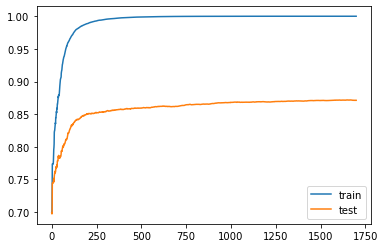

In [52]:
xgb_model2 = XGBClassifier(eta=0.05, colsample_bytree=0.65, eval_metric='auc', max_depth=52,
              n_estimators=1700, scale_pos_weight=0.8, reg_lambda=2,reg_alpha=2.5, subsample=0.5,random_state=0).fit(Xf_train, yf_train)
# define the datasets to evaluate each iteration
evalset = [(Xf_train, yf_train), (Xf_test,yf_test)]
# fit the model
xgb_model2.fit(Xf_train, yf_train, eval_metric='auc', eval_set=evalset)
yhat = xgb_model2.predict(Xf_test)
score = roc_auc_score(yf_test, yhat)
# retrieve performance metrics
results = xgb_model2.evals_result()
# plot learning curves
plt.plot(results['validation_0']['auc'], label='train')
plt.plot(results['validation_1']['auc'], label='test')
# show the legend
plt.legend()
# show the plot
plt.show()

In [30]:
pr_f=0.85*rf5.predict_proba(Xt1)+0.15*xgb_model2.predict_proba(Xt1)
pr_f

array([[0.10285014, 0.89714986],
       [0.09726013, 0.90273987],
       [0.02412614, 0.97587387],
       ...,
       [0.03578247, 0.96421753],
       [0.10282191, 0.89717809],
       [0.08946492, 0.91053508]])

In [31]:
solution=pd.DataFrame({'Id':df_test.Id,'Y':pr_f[:,1]})
solution.head()

,Id,Y
0,16384,0.897150
1,16385,0.902740
2,16386,0.975874
3,16387,0.969903
4,16388,0.953258


In [32]:
solution.to_csv("submission.csv", index = False)